# Standard Complex Gaussian Vector

A **complex Gaussian vector** is a vector whose elements are complex-valued random variables, each following a Gaussian (normal) distribution. For a standard complex Gaussian vector, denoted as $\vec{\mathbf{w}}$:

- The vector $\vec{\mathbf{w}}$ consists of $n$ independent and identically distributed (iid) elements.
- Each element follows a complex normal distribution with mean 0 and variance 1, denoted by $\mathcal{CN}(0, 1)$.

The notation $\vec{\mathbf{w}} \sim \mathcal{CN}(0, \vec{I})$ indicates that $\vec{\mathbf{w}}$ is distributed according to a complex normal distribution with a mean vector of zeros and a covariance matrix equal to the identity matrix $\vec{I}$.

## Probability Density Function (PDF)

The (joint) probability density function (PDF) of a standard complex Gaussian vector $\vec{\mathbf{w}}$ is given by:

$$
f_{\vec{\mathbf{w}}}(\vec{w}) = \frac{1}{\pi^n} e^{-||\vec{w}||^2}, \quad \vec{w} \in \mathbb{C}^n
$$

where:
- $n$ is the dimension of the vector.
- $||\vec{w}||^2$ represents the squared Euclidean norm of the vector $\vec{w}$.

This PDF describes the likelihood of the vector $\vec{\mathbf{w}}$ taking on a particular value $\vec{w}$ in the $n$-dimensional complex space.

## Simulation

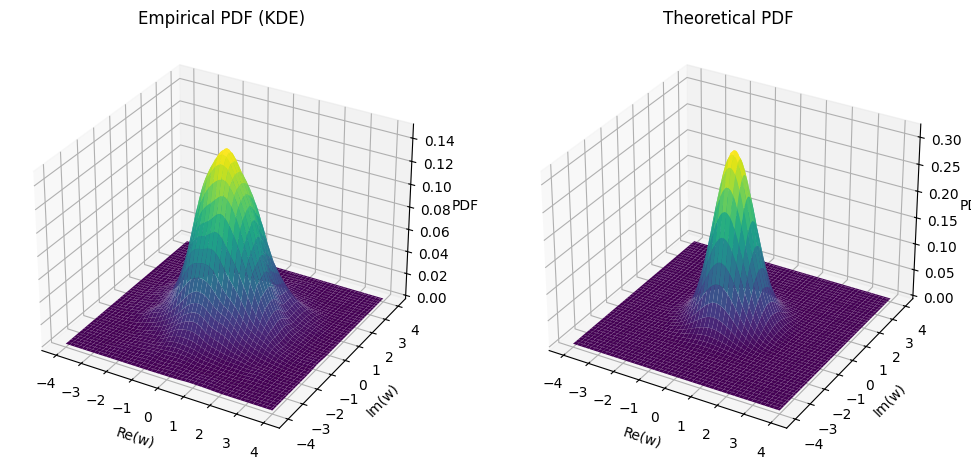

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings("ignore")

# Generate standard complex Gaussian vector
num_samples = 1000
n_dim = 2
real_part = np.random.normal(0, 1, (num_samples, n_dim))
imag_part = np.random.normal(0, 1, (num_samples, n_dim))
complex_vector = real_part + 1j * imag_part

# Flatten the complex vector for KDE
data = np.vstack([complex_vector.real.flatten(), complex_vector.imag.flatten()])

# Empirical PDF using 2D KDE
kde = gaussian_kde(data)
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
positions = np.vstack([X.ravel(), Y.ravel()])
empirical_pdf = kde(positions).reshape(X.shape)

# Theoretical PDF
theoretical_pdf = (1 / np.pi) * np.exp(-(X**2 + Y**2))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

ax[0].plot_surface(X, Y, empirical_pdf, cmap='viridis')
ax[0].set_title('Empirical PDF (KDE)')
ax[0].set_xlabel('Re(w)')
ax[0].set_ylabel('Im(w)')
ax[0].set_zlabel('PDF')

ax[1].plot_surface(X, Y, theoretical_pdf, cmap='viridis')
ax[1].set_title('Theoretical PDF')
ax[1].set_xlabel('Re(w)')
ax[1].set_ylabel('Im(w)')
ax[1].set_zlabel('PDF')

plt.show()


## Derivation for the Marginal PDF of Real and Imaginary Parts

The PDF $\frac{1}{\pi^n} e^{-||\vec{w}||^2}$ describes the distribution of the $n$-dimensional standard complex Gaussian vector $\vec{\mathbf{w}}$. To derive the marginal PDF of the real or imaginary parts of the components of $\vec{\mathbf{w}}$, we can look at the properties of the complex normal distribution.

### Standard Complex Gaussian Vector PDF

For a standard complex Gaussian vector $\vec{\mathbf{w}} \sim \mathcal{CN}(0, \vec{I})$, the PDF is:

$$
f_{\vec{\mathbf{w}}}(\vec{w}) = \frac{1}{\pi^n} e^{-||\vec{w}||^2}
$$

where $||\vec{w}||^2 = \sum_{i=1}^{n} |w_i|^2 = \sum_{i=1}^{n} (x_i^2 + y_i^2)$.

### Marginal Distribution of Real and Imaginary Parts
Each component $w_i = x_i + i y_i$ is a complex Gaussian random variable, where $x_i$ and $y_i$ are real-valued normal random variables. Specifically, for each $i$:
- $x_i$ and $y_i$ are independent and normally distributed with mean 0 and variance 1/2.

### Marginal PDF of a Single Real or Imaginary Part
The marginal PDF for a real or imaginary part of a single component $w_i$ (say $x_i$) is given by the normal distribution with mean 0 and variance 1/2:

$$
f_{x_i}(x) = \sqrt{2} \cdot \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2 \cdot 2} = \frac{1}{\sqrt{\pi}} e^{-x^2}
$$

However, this normalization needs to be aligned with the standard normal distribution with variance 1. For a standard normal distribution (mean 0, variance 1), the PDF is:

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}
$$

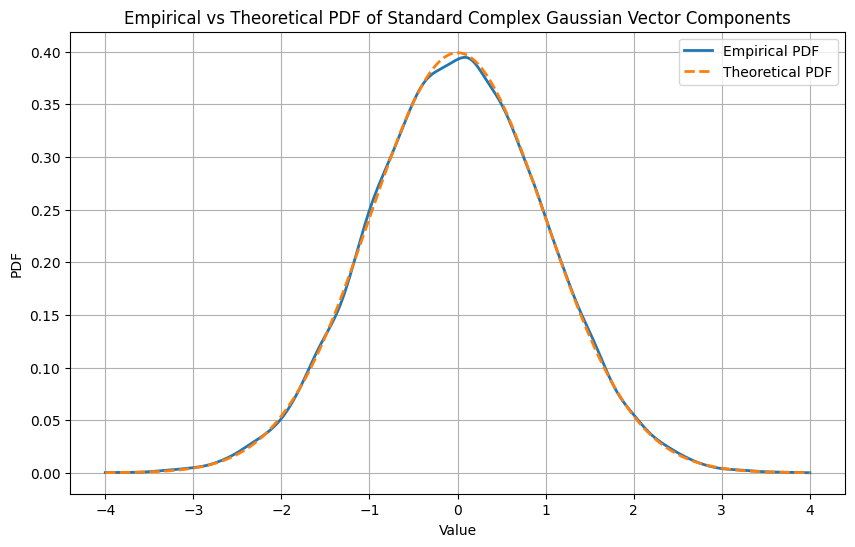

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parameters
n_dim = 2  # Dimension of the complex Gaussian vector
num_samples = 10000  # Number of samples to generate

# Generate standard complex Gaussian vector
real_part = np.random.normal(0, 1, (num_samples, n_dim))
imag_part = np.random.normal(0, 1, (num_samples, n_dim))
complex_vector = real_part + 1j * imag_part

# Flatten the complex vector to a single array for KDE
flattened_complex_vector = np.concatenate([complex_vector.real.flatten(), complex_vector.imag.flatten()])

# Empirical PDF using KDE
kde = gaussian_kde(flattened_complex_vector)
x_vals = np.linspace(-4, 4, 1000)
empirical_pdf = kde(x_vals)

# Theoretical PDF for real and imaginary parts
# NOT for the complex vector
theoretical_pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-x_vals**2 / 2)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(x_vals, empirical_pdf, label='Empirical PDF', linestyle='-', linewidth=2)
plt.plot(x_vals, theoretical_pdf, label='Theoretical PDF', linestyle='--', linewidth=2)
plt.xlabel('Value')
plt.ylabel('PDF')
plt.title('Empirical vs Theoretical PDF of Standard Complex Gaussian Vector Components')
plt.legend()
plt.grid(True)
plt.show()


# Linear Transformation of a Complex Gaussian Vector

Let $\vec{A}$ be a complex matrix. When the vector $\vec{\mathbf{w}}$ is linearly transformed by $\vec{A}$, the resulting vector $\vec{\mathbf{x}}$ is:

$$
\vec{\mathbf{x}} = \vec{A} \vec{\mathbf{w}}
$$

## Distribution of $\vec{\mathbf{x}}$

The transformed vector $\vec{\mathbf{x}}$ follows a complex normal distribution $\mathcal{CN}(0, \vec{K})$ where $\vec{K}$ is the covariance matrix of $\vec{\mathbf{x}}$. The covariance matrix $\vec{K}$ is given by:

$$
\vec{K} = \vec{A} \vec{A}^*
$$

Here, $\vec{A}^*$ denotes the conjugate transpose of $\vec{A}$.

## Probability Density Function (PDF)

The PDF of the vector $\vec{\mathbf{x}}$ is given by:

$$
f_{\vec{\mathbf{x}}}(\vec{x}) = \frac{1}{\pi^n \det \vec{K}} e^{-\vec{x}^* \vec{K}^{-1} \vec{x}}
$$

where:
- $\det \vec{K}$ is the determinant of the covariance matrix $\vec{K}$.
- $\vec{x}^*$ denotes the conjugate transpose of the vector $\vec{x}$.
- $\vec{K}^{-1}$ is the inverse of the covariance matrix $\vec{K}$.

This PDF describes the likelihood of the vector $\vec{\mathbf{x}}$ taking on a particular value $\vec{x}$ in the $n$-dimensional complex space.



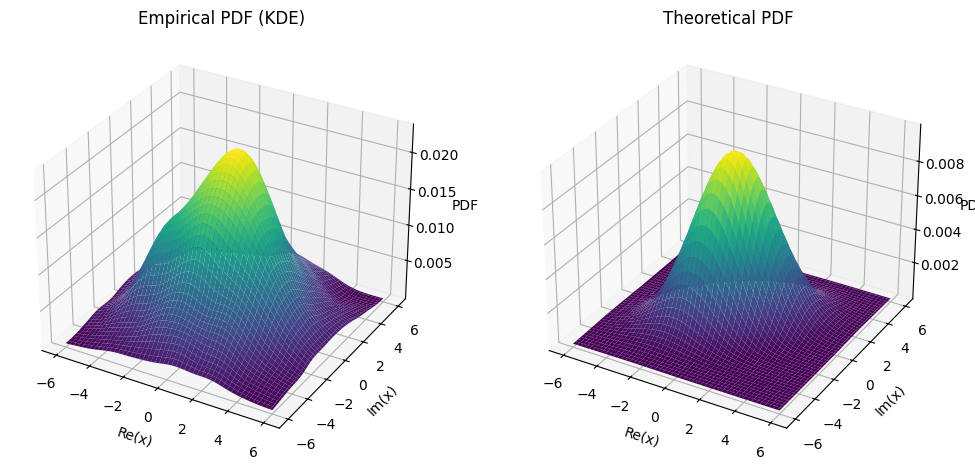

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the complex matrix A
A = np.array([[1+1j, 2-1j], [2+0j, 1+1j]])

# Generate standard complex Gaussian vector w
num_samples = 1000
n_dim = 2
real_part = np.random.normal(0, 1, (num_samples, n_dim))
imag_part = np.random.normal(0, 1, (num_samples, n_dim))
w = real_part + 1j * imag_part

# Linear transformation to get x
x = np.dot(w, A.T)

# Flatten the complex vector for KDE
data = np.vstack([x.real.flatten(), x.imag.flatten()])

# Empirical PDF using 2D KDE
kde = gaussian_kde(data)
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
positions = np.vstack([X.ravel(), Y.ravel()])
empirical_pdf = kde(positions).reshape(X.shape)

# Compute the covariance matrix K
K = np.dot(A, A.conj().T)
K_inv = np.linalg.inv(K)
det_K = np.linalg.det(K)

# Theoretical PDF
Z = X + 1j * Y
Z_vec = np.vstack([Z.real.ravel(), Z.imag.ravel()])
theoretical_pdf = (1 / (np.pi * det_K)) * np.exp(-np.einsum('ij,ji->i', Z_vec.T @ K_inv, Z_vec).real).reshape(X.shape)

# Plotting
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, empirical_pdf, cmap='viridis')
ax1.set_title('Empirical PDF (KDE)')
ax1.set_xlabel('Re(x)')
ax1.set_ylabel('Im(x)')
ax1.set_zlabel('PDF')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, theoretical_pdf, cmap='viridis')
ax2.set_title('Theoretical PDF')
ax2.set_xlabel('Re(x)')
ax2.set_ylabel('Im(x)')
ax2.set_zlabel('PDF')

plt.show()


## Marginal PDFs

The PDF of the transformed complex Gaussian vector $\vec{\mathbf{x}}$ is given by:

$$
f_{\vec{\mathbf{x}}}(\vec{x}) = \frac{1}{\pi^n \det \vec{K}} e^{-\vec{x}^* \vec{K}^{-1} \vec{x}}
$$

To determine if the marginal PDF for each real and imaginary part is correct, we need to consider how the linear transformation affects these components. Given a complex matrix $\vec{A}$ and a standard complex Gaussian vector $\vec{\mathbf{w}}$, the resulting vector $\vec{\mathbf{x}} = \vec{A} \vec{\mathbf{w}}$ will follow a complex normal distribution with a mean of 0 and a covariance matrix $\vec{K} = \vec{A} \vec{A}^*$.

### Marginal PDF for Each Real and Imaginary Part

For a complex Gaussian vector, each component (real and imaginary parts) can be treated as a normal distribution when marginalizing. The covariance matrix $\vec{K}$ describes the variance and covariance of the transformed vector $\vec{\mathbf{x}}$.

If $\vec{K}$ is the covariance matrix of $\vec{\mathbf{x}}$, then the variance of the real part of $x_i$ is given by $\mathrm{Re}(K_{ii})$, where $K_{ii}$ is the diagonal element of $\vec{K}$.

The marginal PDF of a single real or imaginary part (say, $x_i$) can be expressed as:

$$
f_{x_i}(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{x^2}{2 \sigma^2} \right)
$$

where $\sigma^2$ is the variance.

### Marginal PDF

The variance $\sigma^2$ of the real part of the transformed complex Gaussian vector component should be $\mathrm{Re}(K_{ii})$. When calculating the marginal PDF of the real part, we use the variance $\mathrm{Re}(K_{ii})$ directly, because the complex Gaussian's real and imaginary parts each have this variance.

Therefore, the marginal PDF for the real part is:

$$
f_{\text{Re}(x_i)}(x) = \frac{1}{\sqrt{2 \pi \mathrm{Re}(K_{ii})}} \exp\left( -\frac{x^2}{2 \mathrm{Re}(K_{ii})} \right)
$$

Similarly, the marginal PDF for the imaginary part is:

$$
f_{\text{Im}(x_i)}(y) = \frac{1}{\sqrt{2 \pi \mathrm{Re}(K_{ii})}} \exp\left( -\frac{y^2}{2 \mathrm{Re}(K_{ii})} \right)
$$

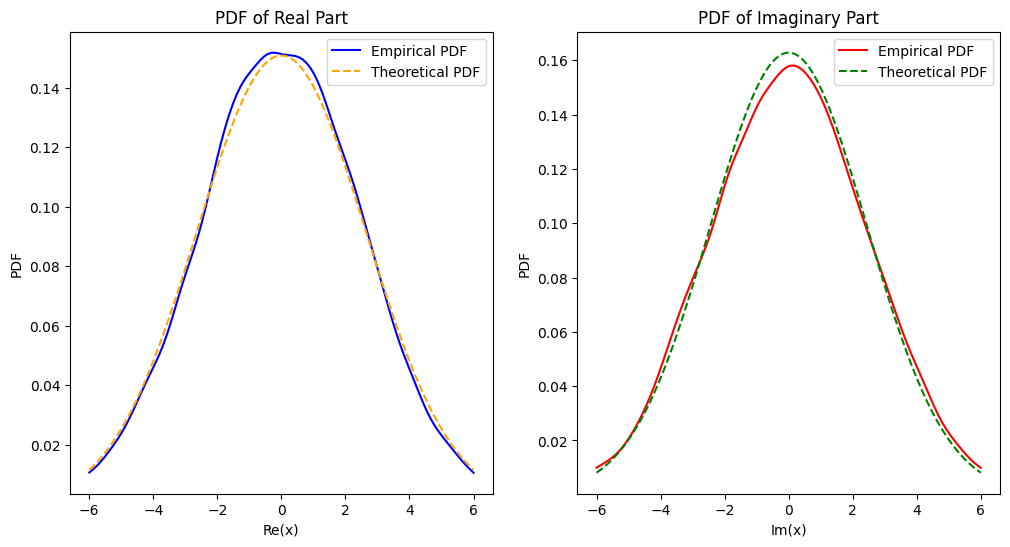

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the complex matrix A
A = np.array([[1+1j, 2-1j], [2+0j, 1+1j]])

# Generate standard complex Gaussian vector w
num_samples = 10000
n_dim = 2
real_part = np.random.normal(0, 1, (num_samples, n_dim))
imag_part = np.random.normal(0, 1, (num_samples, n_dim))
w = real_part + 1j * imag_part

# Linear transformation to get x
x = np.dot(w, A.T)

# Extract real and imaginary parts
x_real = x.real.flatten()
x_imag = x.imag.flatten()

# Empirical PDF using 1D KDE for real part
kde_real = gaussian_kde(x_real)
x_real_vals = np.linspace(-6, 6, 100)
empirical_pdf_real = kde_real(x_real_vals)

# Empirical PDF using 1D KDE for imaginary part
kde_imag = gaussian_kde(x_imag)
x_imag_vals = np.linspace(-6, 6, 100)
empirical_pdf_imag = kde_imag(x_imag_vals)

# Compute the covariance matrix K
K = np.dot(A, A.conj().T)
K_inv = np.linalg.inv(K)
det_K = np.linalg.det(K)

# Theoretical PDF for real and imaginary parts
# Method 1: Using the covariance matrix
# theoretical_pdf_real = (1 / np.sqrt(2 * np.pi * K[0, 0].real)) * np.exp(-0.5 * (x_real_vals ** 2) / K[0, 0].real)
# Method 2: Using the square root of the covariance matrix
sigma_real = np.sqrt(K[0, 0].real)
theoretical_pdf_real = (1 / np.sqrt(2 * np.pi * sigma_real**2)) * np.exp(-0.5 * (x_real_vals ** 2) / sigma_real**2)
# Method 1: Using the covariance matrix
# theoretical_pdf_imag = (1 / np.sqrt(2 * np.pi * K[1, 1].real)) * np.exp(-0.5 * (x_imag_vals ** 2) / K[1, 1].real)
# Method 2: Using the square root of the covariance matrix
sigma_imag = np.sqrt(K[1, 1].real)
theoretical_pdf_imag = (1 / np.sqrt(2 * np.pi * sigma_imag**2)) * np.exp(-0.5 * (x_imag_vals ** 2) / sigma_imag**2)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(x_real_vals, empirical_pdf_real, color='blue', label='Empirical PDF')
ax[0].plot(x_real_vals, theoretical_pdf_real, color='orange', linestyle='--', label='Theoretical PDF')
ax[0].set_title('PDF of Real Part')
ax[0].set_xlabel('Re(x)')
ax[0].set_ylabel('PDF')
ax[0].legend()

ax[1].plot(x_imag_vals, empirical_pdf_imag, color='red', label='Empirical PDF')
ax[1].plot(x_imag_vals, theoretical_pdf_imag, color='green', linestyle='--', label='Theoretical PDF')
ax[1].set_title('PDF of Imaginary Part')
ax[1].set_xlabel('Im(x)')
ax[1].set_ylabel('PDF')
ax[1].legend()

plt.show()


# Unitary Transformation and Isotropy

#### Definition and Properties of Unitary Matrix

A **unitary matrix** $\vec{U}$ is a complex square matrix that satisfies the property:

$$
\vec{U}^* \vec{U} = \vec{I}
$$

where $\vec{U}^*$ denotes the conjugate transpose of $\vec{U}$, and $\vec{I}$ is the identity matrix. This property implies that $\vec{U}$ preserves the inner product, lengths, and angles in the complex vector space.

#### Effect of Unitary Transformation on Complex Gaussian Vector

Consider a standard complex Gaussian vector $\vec{\mathbf{w}} \sim \mathcal{CN}(0, \vec{I})$. When $\vec{\mathbf{w}}$ is transformed by a unitary matrix $\vec{U}$, the resulting vector $\vec{\mathbf{x}} = \vec{U} \vec{\mathbf{w}}$ will also follow the same distribution. Mathematically,

$$
\vec{\mathbf{w}} \sim \mathcal{CN}(0, \vec{I}) \implies \vec{U} \vec{\mathbf{w}} \sim \mathcal{CN}(0, \vec{I})
$$

This invariance under unitary transformations indicates that the distribution of $\vec{\mathbf{w}}$ does not change, which is a hallmark of **isotropy**.

#### Isotropy

**Isotropy** means that the statistical properties of $\vec{\mathbf{w}}$ are identical in all directions. Specifically, for a complex Gaussian vector:
- **Rotational Invariance**: The distribution remains unchanged under rotations (unitary transformations).
- **Independence in Orthonormal Directions**: The projections of $\vec{\mathbf{w}}$ onto any set of orthonormal vectors are independent and identically distributed.

These properties imply that $\vec{\mathbf{w}}$ has no preferred direction, and its statistical characteristics are the same in every direction.

#### Extension to General Complex Gaussian Vector

The properties of unitary transformations and isotropy extend to a more general complex Gaussian vector $\vec{\mathbf{w}} \sim \mathcal{CN}(0, \sigma^2 \vec{I})$, where the covariance matrix is a scaled identity matrix. In this case:

$$
\vec{\mathbf{w}} \sim \mathcal{CN}(0, \sigma^2 \vec{I})
$$

A unitary transformation $\vec{U}$ applied to $\vec{\mathbf{w}}$ results in:

$$
\vec{\mathbf{x}} = \vec{U} \vec{\mathbf{w}} \sim \mathcal{CN}(0, \sigma^2 \vec{I})
$$

This demonstrates that the distribution of $\vec{\mathbf{w}}$ remains unchanged under unitary transformations, reinforcing the concept of isotropy for any $\vec{\mathbf{w}} \sim \mathcal{CN}(0, \sigma^2 \vec{I})$.


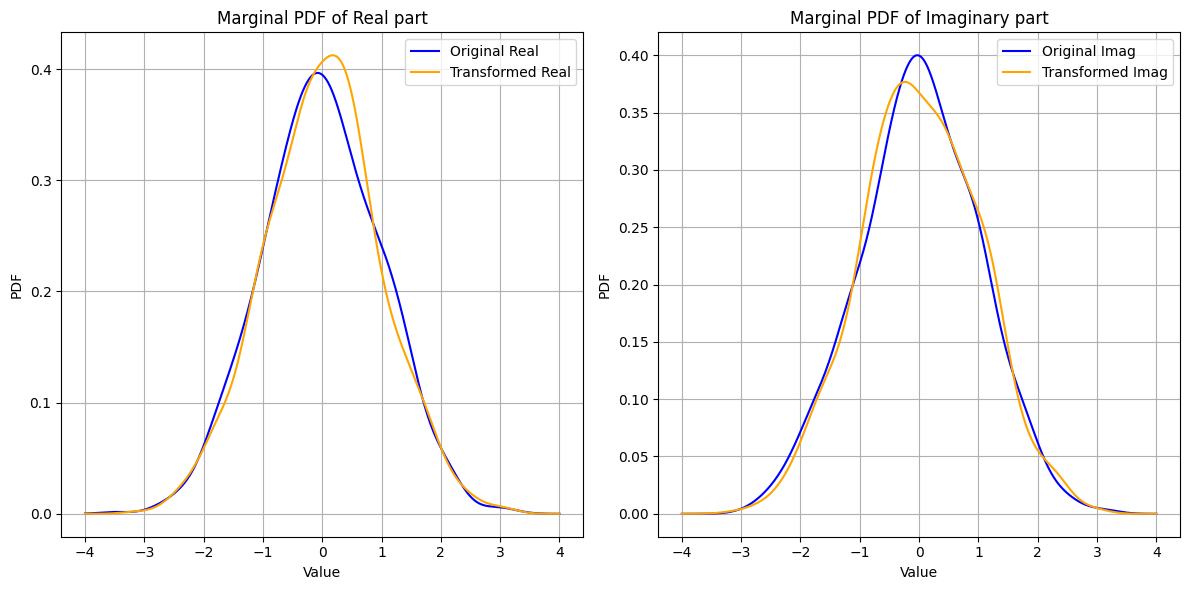

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the size of the Gaussian vector
n_dim = 2
num_samples = 1000

# Generate standard complex Gaussian vector w
real_part = np.random.normal(0, 1, (num_samples, n_dim))
imag_part = np.random.normal(0, 1, (num_samples, n_dim))
w = real_part + 1j * imag_part

# Example 1: Rotation by 45 degrees
# Define the unitary matrix U
theta = np.pi / 4  # 45 degrees
U = (1/np.sqrt(2)) * np.array([[np.cos(theta) + 1j * np.sin(theta), -np.sin(theta) + 1j * np.cos(theta)],
              [np.sin(theta) + 1j * np.cos(theta), np.cos(theta) - 1j * np.sin(theta)]])

# Example 2: Random unitary matrix
# # Generate a random unitary matrix U
# # Using QR decomposition of a random complex matrix
# A = np.random.randn(n_dim, n_dim) + 1j * np.random.randn(n_dim, n_dim)
# Q, R = np.linalg.qr(A)
# U = Q

# Apply the unitary transformation
x = np.dot(w, U.T)

# Marginal PDFs
def plot_marginal_pdfs(data, label, color, ax):
    real_data = data[:, 0].real
    imag_data = data[:, 0].imag
    
    kde_real = gaussian_kde(real_data)
    kde_imag = gaussian_kde(imag_data)
    
    x_vals = np.linspace(-4, 4, 1000)
    
    ax[0].plot(x_vals, kde_real(x_vals), label=f'{label} Real', color=color)
    ax[1].plot(x_vals, kde_imag(x_vals), label=f'{label} Imag', color=color)

# Plot the marginal PDFs for the original and transformed vectors
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = ['blue', 'orange']

plot_marginal_pdfs(w, 'Original', colors[0], ax)
plot_marginal_pdfs(x, 'Transformed', colors[1], ax)

for i, title in enumerate(['Real part', 'Imaginary part']):
    ax[i].set_title(f'Marginal PDF of {title}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('PDF')
    ax[i].legend()
    ax[i].grid(True)

plt.tight_layout()
plt.show()


In [6]:
import numpy as np

# Define the unitary matrix U
theta = np.pi / 4  # 45 degrees
U = (1/np.sqrt(2)) * np.array([[np.cos(theta) + 1j * np.sin(theta), -np.sin(theta) + 1j * np.cos(theta)],
              [np.sin(theta) + 1j * np.cos(theta), np.cos(theta) - 1j * np.sin(theta)]])

# Compute the conjugate transpose of U
U_conj_transpose = np.conjugate(U.T)

# Check if U * U^H equals the identity matrix
result = np.dot(U_conj_transpose, U)

# Display the result
print("U_conj_transpose * U:\n", result)
print("\nIdentity matrix:\n", np.eye(2))

# Check if the result is close to the identity matrix
is_unitary = np.allclose(result, np.eye(2))
print("\nIs the matrix U unitary?", is_unitary)


U_conj_transpose * U:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Identity matrix:
 [[1. 0.]
 [0. 1.]]

Is the matrix U unitary? True


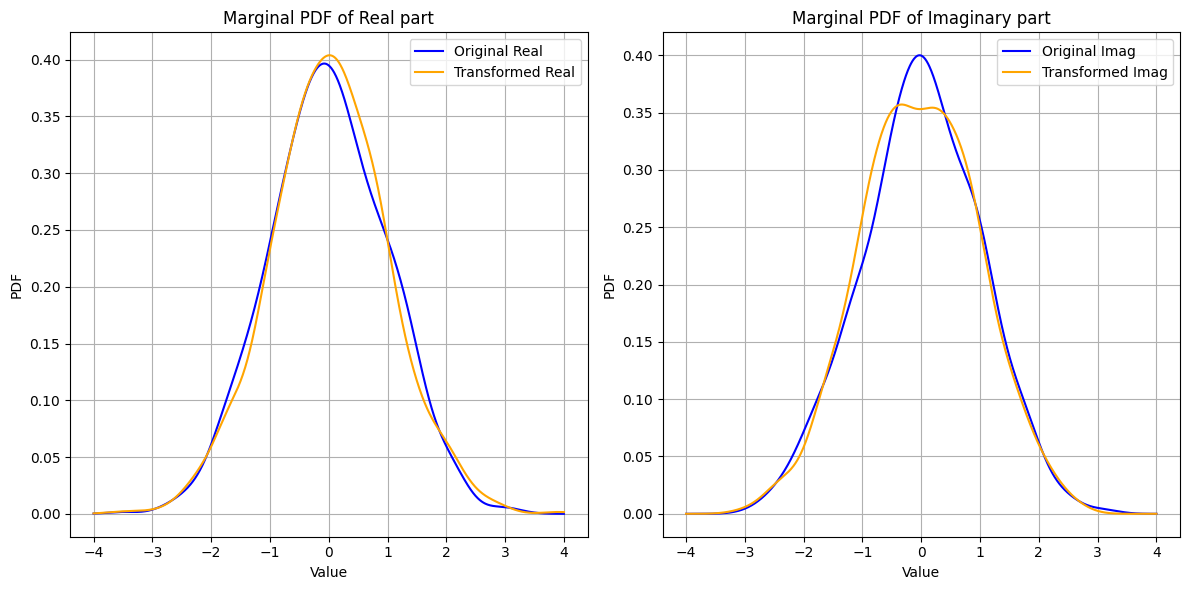

In [7]:

# Example 2: Random unitary matrix
# Generate a random unitary matrix U
# Using QR decomposition of a random complex matrix
A = np.random.randn(n_dim, n_dim) + 1j * np.random.randn(n_dim, n_dim)
Q, R = np.linalg.qr(A)
U = Q

# Apply the unitary transformation
x = np.dot(w, U.T)

# Marginal PDFs
def plot_marginal_pdfs(data, label, color, ax):
    real_data = data[:, 0].real
    imag_data = data[:, 0].imag
    
    kde_real = gaussian_kde(real_data)
    kde_imag = gaussian_kde(imag_data)
    
    x_vals = np.linspace(-4, 4, 1000)
    
    ax[0].plot(x_vals, kde_real(x_vals), label=f'{label} Real', color=color)
    ax[1].plot(x_vals, kde_imag(x_vals), label=f'{label} Imag', color=color)

# Plot the marginal PDFs for the original and transformed vectors
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = ['blue', 'orange']

plot_marginal_pdfs(w, 'Original', colors[0], ax)
plot_marginal_pdfs(x, 'Transformed', colors[1], ax)

for i, title in enumerate(['Real part', 'Imaginary part']):
    ax[i].set_title(f'Marginal PDF of {title}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('PDF')
    ax[i].legend()
    ax[i].grid(True)

plt.tight_layout()
plt.show()
